# Import Python Libraries 

In [4]:
# Import libraries here that you need for different processing steps
import nltk
import csv
import spacy
import pandas as pd

# Functions to read data and convert it into dataframe

In [5]:
# Reading a dataset from a csv file into a dataframe. Run this cell to load the dataset in memory 
# and see shape and data types of the data.

df1 = pd.read_csv('./Dataset/covid.csv')
print(df1.dtypes)
print(df1.shape)

df1.head()

UserName         object
ScreenName       object
Location         object
TweetAt          object
OriginalTweet    object
Sentiment        object
dtype: object
(41159, 6)


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [6]:
# Reading a dataset from a csv zip file into a dataframe. Run this cell to load the dataset in memory 
# and see shape and data types of the data.

df2 = pd.read_csv('./Dataset/covid.csv.zip',
                  compression='zip',encoding="UTF-8", header=0, sep=',', quotechar='"')

print(df2.dtypes)
print(df2.shape)

df2.head()

UserName         object
ScreenName       object
Location         object
TweetAt          object
OriginalTweet    object
Sentiment        object
dtype: object
(41159, 6)


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


## Function to write data to a csv file

In [7]:
# Run this cell to save the subset of the dataframe to a csv file.
subset = df2[0:2000]
subset.to_csv('./Dataset/covid_subset.csv', index=None)

In [1]:
## Reading a CSV into a list for processing line by line.

In [8]:
import numpy as np
# Run this cell to read the dataframe from a csv file into a list of list.

with open('./Dataset/covid_subset.csv',encoding="UTF-8") as f:
    content = f.readlines()
    
lines = np.array(content) 
num_of_instances = lines.size

print(num_of_instances)
print(lines[0])
print(lines[1])
print(lines[2])

5710
UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment

3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral

3800,48752,UK,16-03-2020,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order,Positive



## Data Exploration

### Length of text
##### Identify the text column on which you have to apply text processing in the dataset

In [9]:
# Run the cell to see the behaviour of the textual attributes in the dataset

print(df1.OriginalTweet.str.len().max())

355.0


### Describe numeric data columns

In [10]:
# Run the cell to see the behaviour of the numeric attributes in the dataset. They might/might not mean anything
# depending on the column meaning

df1.describe()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
count,41158,41158,32567,41157,41157,41155
unique,41158,41158,12220,30,41157,5
top,3799,48751,London,20-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Positive
freq,1,1,540,3448,1,11422


### Tokenize sentences

In [11]:
# Run this cell to see the Tweet in the sixth row of the dataset

six_dialogue = df1.loc[5, "OriginalTweet"]
print(six_dialogue)

As news of the regionÂs first confirmed COVID-19 case came out of Sullivan County last week, people flocked to area stores to purchase cleaning supplies, hand sanitizer, food, toilet paper and other goods, @Tim_Dodson reports https://t.co/cfXch7a2lU


#### Tokenize sentences using nltk

In [12]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/owenmonroe/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [13]:
# Run this cell to see the Tweet in the six row of the dataset in the form of Tokens using nltk library

from nltk.tokenize import sent_tokenize

sent_tokenize(six_dialogue)

['As news of the regionÂ\x92s first confirmed COVID-19 case came out of Sullivan County last week, people flocked to area stores to purchase cleaning supplies, hand sanitizer, food, toilet paper and other goods, @Tim_Dodson reports https://t.co/cfXch7a2lU']

#### Tokenize sentences using spacy

In [14]:
# !python -m spacy download en

In [15]:
# Run this cell to see the Tweet in the first row of the dataset in the form of Tokens using another library

from spacy.lang.en import English

nlp = spacy.load("en_core_web_sm")
[sent.text for sent in nlp(six_dialogue).sents]

['As news of the regionÂ\x92s first confirmed COVID-19 case came out of Sullivan County last week, people flocked to area stores to purchase cleaning supplies, hand sanitizer, food, toilet paper and other goods, @Tim_Dodson reports https://t.co/cfXch7a2lU']

### Tokenize words

In [16]:
# Run this cell to see the Tweet in the six row of the dataset

six_dialogue = df1.loc[5, "OriginalTweet"]
print(six_dialogue)

As news of the regionÂs first confirmed COVID-19 case came out of Sullivan County last week, people flocked to area stores to purchase cleaning supplies, hand sanitizer, food, toilet paper and other goods, @Tim_Dodson reports https://t.co/cfXch7a2lU


#### Tokenize words using nltk

In [17]:
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

words = [x for x  in tok.tokenize(six_dialogue) if len(x) > 1]
print(words)

['As', 'news', 'of', 'the', 'regionÂ', 'first', 'confirmed', 'COVID', '19', 'case', 'came', 'out', 'of', 'Sullivan', 'County', 'last', 'week', 'people', 'flocked', 'to', 'area', 'stores', 'to', 'purchase', 'cleaning', 'supplies', 'hand', 'sanitizer', 'food', 'toilet', 'paper', 'and', 'other', 'goods', 'Tim_Dodson', 'reports', 'https', '://', 'co', 'cfXch7a2lU']


#### Tokenize words using spacy

In [18]:
from spacy.lang.en import English
nlp = English()

# Creating a Tokenizer with the default settings for English
tokenizer = nlp.tokenizer
doc = tokenizer(six_dialogue)
words = [token.text for token in doc]
print(words)

['As', 'news', 'of', 'the', 'regionÂ\x92s', 'first', 'confirmed', 'COVID-19', 'case', 'came', 'out', 'of', 'Sullivan', 'County', 'last', 'week', ',', 'people', 'flocked', 'to', 'area', 'stores', 'to', 'purchase', 'cleaning', 'supplies', ',', 'hand', 'sanitizer', ',', 'food', ',', 'toilet', 'paper', 'and', 'other', 'goods', ',', '@Tim_Dodson', 'reports', 'https://t.co/cfXch7a2lU']


### Word Clouds

#### Just a fancy way to see what all words appear in your textual columns. Run the below cells to see what words occurs in the Tweets. Don't worry about the code.

In [19]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

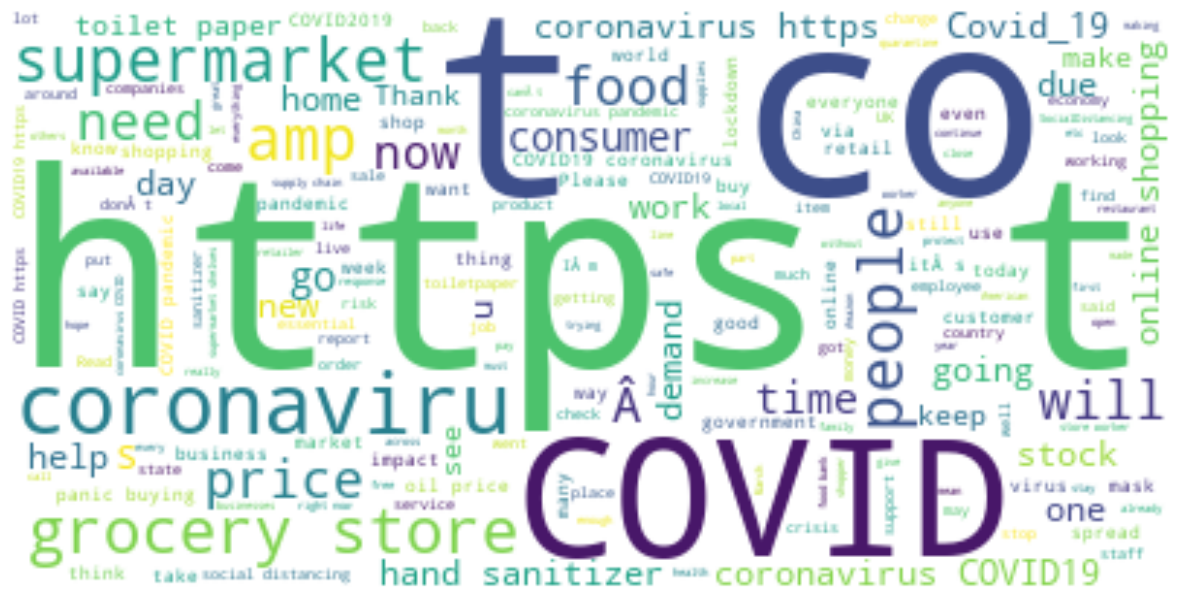

In [20]:
text = " ".join(str(i) for i in df1.OriginalTweet)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()